In [1]:
# Importando as bibliotecas
# Importing the libraries

import numpy as np
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt

In [2]:
# Seleciona o número de simulações e portfolios por simulação
# Select the number of simulation and portfolios per simulation

Portfolios_per_simulation = 100
number_of_simulations = 10

In [3]:
# 01 de janeiro de 2018

stocks_01_01_2018 = ["ABEV3.SA", "AMER3.SA", "ALOS3.SA", "BBAS3.SA", "BBDC3.SA", "BBDC4.SA", "BBSE3.SA", "BRAP4.SA",
                     "BRFS3.SA", "BRKM5.SA", "B3SA3.SA", "CCRO3.SA", "CIEL3.SA", "CMIG4.SA",
                     "COGN3.SA", "CPFE3.SA", "CPLE6.SA", "CSAN3.SA", "CSNA3.SA", "CYRE3.SA", "ECOR3.SA",
                     "EGIE3.SA", "ELET3.SA", "ELET6.SA", "EMBR3.SA", "EQTL3.SA", "YDUQ3.SA",
                     "FLRY3.SA", "GGBR4.SA", "GOAU4.SA", "GOLL4.SA", "HYPE3.SA", "IGTI11.SA",
                     "ITSA4.SA", "ITUB4.SA", "JBSS3.SA", "KLBN11.SA", "RENT3.SA", "LREN3.SA", "MGLU3.SA",
                     "MRFG3.SA", "MRVE3.SA", "MULT3.SA", "NTCO3.SA", "PCAR3.SA", "PETR3.SA", "PETR4.SA",
                     "QUAL3.SA", "RADL3.SA", "RAIL3.SA", "SBSP3.SA", "SAPR11.SA", "SANB11.SA", "SUZB3.SA",
                     "TAEE11.SA", "TIMS3.SA", "UGPA3.SA", "USIM5.SA", "VALE3.SA", "VIVT3.SA", "WEGE3.SA"]

In [4]:
# 11 de janeiro de 2019

stocks_11_01_2019 = ["ABEV3.SA", "AMER3.SA", "B3SA3.SA", "BBAS3.SA", "BBDC3.SA", "BBDC4.SA", "BBSE3.SA", "BRAP4.SA", "VBBR3.SA", "BRFS3.SA", "BRKM5.SA",
                     "ALOS3.SA", "CCRO3.SA", "CIEL3.SA", "CMIG4.SA", "CSAN3.SA", "CSNA3.SA", "CVCB3.SA", "CYRE3.SA", "ECOR3.SA",
                     "EGIE3.SA", "ELET3.SA", "ELET6.SA", "EMBR3.SA", "EQTL3.SA", "YDUQ3.SA", "FLRY3.SA", "GGBR4.SA", "GOAU4.SA",
                     "GOLL4.SA", "HYPE3.SA", "IGTI11.SA", "ITSA4.SA", "ITUB4.SA", "JBSS3.SA", "KLBN11.SA", "COGN3.SA", "LOGG3.SA",
                     "LREN3.SA", "MGLU3.SA", "MRFG3.SA", "MRVE3.SA", "MULT3.SA", "NTCO3.SA", "PCAR3.SA", "PETR3.SA", "PETR4.SA", "QUAL3.SA",
                     "RADL3.SA", "RAIL3.SA", "RENT3.SA", "SANB11.SA", "SBSP3.SA", "GOLL4.SA", "SUZB3.SA", "TAEE11.SA", "TIMS3.SA", "UGPA3.SA",
                     "USIM5.SA", "VALE3.SA", "VIVT3.SA", "BHIA3.SA", "WEGE3.SA"]

In [5]:
# 06 de janeiro de 2020

stocks_06_01_2020 = ["ABEV3.SA", "AZUL4.SA", "B3SA3.SA", "BBSE3.SA", "BBDC3.SA", "BBDC4.SA", "BRAP4.SA", "BBAS3.SA",
                     "BRKM5.SA", "BRFS3.SA", "BPAC11.SA", "CRFB3.SA", "CCRO3.SA", "CMIG4.SA", "CIEL3.SA", "COGN3.SA", "CSAN3.SA",
                     "CVCB3.SA", "CYRE3.SA", "ECOR3.SA", "ELET3.SA", "ELET6.SA", "EMBR3.SA", "EGIE3.SA", "EQTL3.SA", "FLRY3.SA",
                     "GGBR4.SA", "GOAU4.SA", "GOLL4.SA", "NTCO3.SA", "HAPV3.SA", "HYPE3.SA", "IRBR3.SA", "ITSA4.SA", "IGTI11.SA",
                     "ITUB4.SA", "JBSS3.SA", "KLBN11.SA", "RENT3.SA", "AMER3.SA", "LREN3.SA", "MGLU3.SA", "MRFG3.SA", "MRVE3.SA", "MULT3.SA",
                     "PCAR3.SA", "PETR3.SA", "PETR4.SA", "VBBR3.SA", "QUAL3.SA", "RADL3.SA", "RAIL3.SA", "SBSP3.SA", "SANB11.SA", "CSNA3.SA",
                     "SUZB3.SA", "TAEE11.SA", "VIVT3.SA", "TIMS3.SA", "TOTS3.SA", "UGPA3.SA", "USIM5.SA", "VALE3.SA",
                     "BHIA3.SA", "WEGE3.SA", "YDUQ3.SA"]

In [6]:
def MMPT(Portfolios_per_simulation, stocks, start_date, end_date):

  df = yfin.download(stocks, start=start_date, end=end_date)['Adj Close']

  nan_counts = df.isna().sum()
  for ticker in nan_counts[nan_counts > 0].keys():
    stocks.remove(ticker)
    df = df.drop([ticker], axis=1)

  num_stocks = df.shape[1]

  daily_variation = (df/df.shift(1))-1
  daily_variation.iloc[0] = 0

  daily_variation_covariance = daily_variation.cov()

  daily_variation_correlation = daily_variation.corr()

  portfolios = pd.DataFrame(columns=['Weights', 'Return', 'Vol', 'Ratio', 'Correlation'])

  for x in range(Portfolios_per_simulation):
    # Escolhe o peso de cada ação de forma aleatória
    # Choose the weight of each stock ramdomly
    weights = np.random.random(num_stocks)
    # Garante que nenhum peso seja igual a 100%
    # Ensures no weight equals 100%
    weights /= np.sum(weights)
    # Calcula o retorno esperado do portfolio, multiplicando o peso de cada ação por sua variação anual média
    # Calculates the expected return on the portfolio, multiplying the weight of each stock by its average annual variation
    portfolio_returns = np.sum(daily_variation.mean()*weights)*250
    # Calcula a volatilidade do portfolio, obtendo a raiz quadrada da multiplicação da matriz de pesos transposta multiplicada pela multiplicação da covariância da variação anual pelo peso de cada ação
    # Calculates the volatility of the portfolio, obtaining the square root of the multiplication of the transposed weight matrix multiplied by the multiplication of the covariance of the annual variation by the weight of each stock
    portfolio_vol = np.sqrt(np.dot(weights.T,np.dot(daily_variation_covariance*250,weights)))
    # Calcula a correlação do portfolio, obtendo a raiz quadrada da multiplicação da matriz de pesos transposta multiplicada pela multiplicação da correlação da variação anual pelo peso de cada ação
    # Calculates the correlation of the portfolio, obtaining the square root of the multiplication of the transposed weight matrix multiplied by the multiplication of the correlation of the annual variation by the weight of each stock
    portfolio_corr = np.sqrt(np.dot(weights.T,np.dot(daily_variation_correlation,weights)))

    # Obtém a razão entre retorno e volatilidade
    # Gets the ratio between return and volatility
    ratio = portfolio_returns/portfolio_vol

    daily_performance = list(np.dot(daily_variation, weights))

    portfolio = pd.DataFrame({'Weights':[dict(zip(stocks, weights))],
                              'Return':portfolio_returns,
                              'Vol':portfolio_vol,
                              'Ratio':ratio,
                              'Correlation':portfolio_corr,
                              'Daily Performance':[dict(zip(df.index, daily_performance))]}, index=[0])

    portfolios = pd.concat([portfolios, portfolio], ignore_index=True)

  id_maxRatio = portfolios['Ratio'].idxmax()

  maxRatio_portfolio = dict(portfolios.loc[id_maxRatio])

  maxRatio_portfolio['All Portfolios Vol'] = list(portfolios['Vol'])
  maxRatio_portfolio['All Portfolios Return'] = list(portfolios['Return'])
  maxRatio_portfolio['All Portfolios Ratio'] = list(portfolios['Ratio'])

  return maxRatio_portfolio


In [7]:
def Mult_MMPT(number_of_simulations, Portfolios_per_simulation, stocks, start_date, end_date):

  portfolios = pd.DataFrame(columns=['All Portfolios Vol', 'All Portfolios Return', 'All Portfolios Ratio', 'Weights', 'Daily Performance', 'Return', 'Vol', 'Ratio', 'Correlation'])

  for y in range(number_of_simulations):

    portfolio = MMPT(Portfolios_per_simulation, stocks, start_date, end_date)

    portfolio = pd.DataFrame({'Weights': [portfolio['Weights']],
                              'Daily Performance': [portfolio['Daily Performance']],
                              'Return': [portfolio['Return']],
                              'Vol': [portfolio['Vol']],
                              'Ratio': [portfolio['Ratio']],
                              'Correlation': [portfolio['Correlation']],
                              'All Portfolios Vol': [portfolio['All Portfolios Vol']],
                              'All Portfolios Return': [portfolio['All Portfolios Return']],
                              'All Portfolios Ratio': [portfolio['All Portfolios Ratio']]})

    portfolios = pd.concat([portfolios, portfolio], ignore_index=True)

  return portfolios

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  61 of 61 completed

2 Failed downloads:
['CIEL3.SA']: YFChartError('%ticker%: No data found, symbol may be delisted')
['ALOS3.SA']: YFChartError("%ticker%: Data doesn't exist for startDate = 1514772000, endDate = 1654052400")
C:\Users\joaov\AppData\Local\Temp\ipykernel_26156\871854796.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  portfolios = pd.concat([portfolios, portfolio], ignore_index=True)
C:\Users\joaov\AppData\Local\Temp\ipykernel_26156\866347862.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or

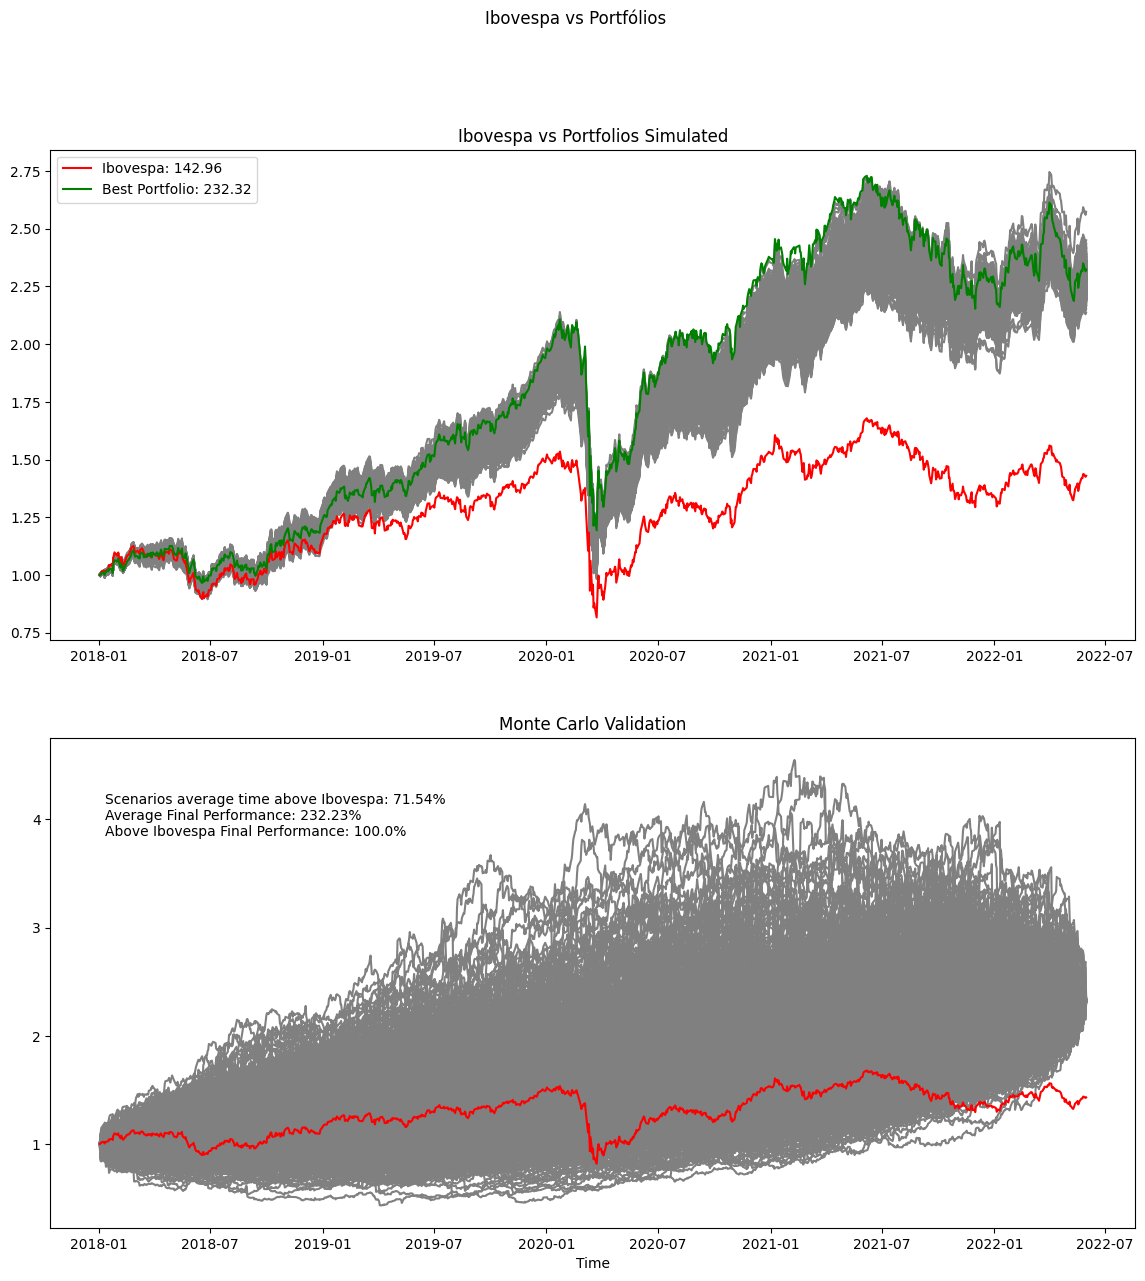

             Weight
RENT3.SA   0.037157
RADL3.SA   0.036581
EQTL3.SA   0.036513
CMIG4.SA   0.035822
SUZB3.SA   0.033106
BBAS3.SA   0.032215
SANB11.SA  0.031859
VIVT3.SA   0.031847
CSAN3.SA   0.031295
TAEE11.SA  0.031010


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  62 of 62 completed

2 Failed downloads:
['CIEL3.SA']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query1.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))
['ALOS3.SA']: YFChartError("%ticker%: Data doesn't exist for startDate = 1547172000, endDate = 1686452400")
C:\Users\joaov\AppData\Local\Temp\ipykernel_26156\871854796.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  portfolios = pd.concat([portfolios, portfolio], ignore_index=True)
C:\Users\joaov\AppData\Local\Temp\ipykernel_26156\866347862.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is de

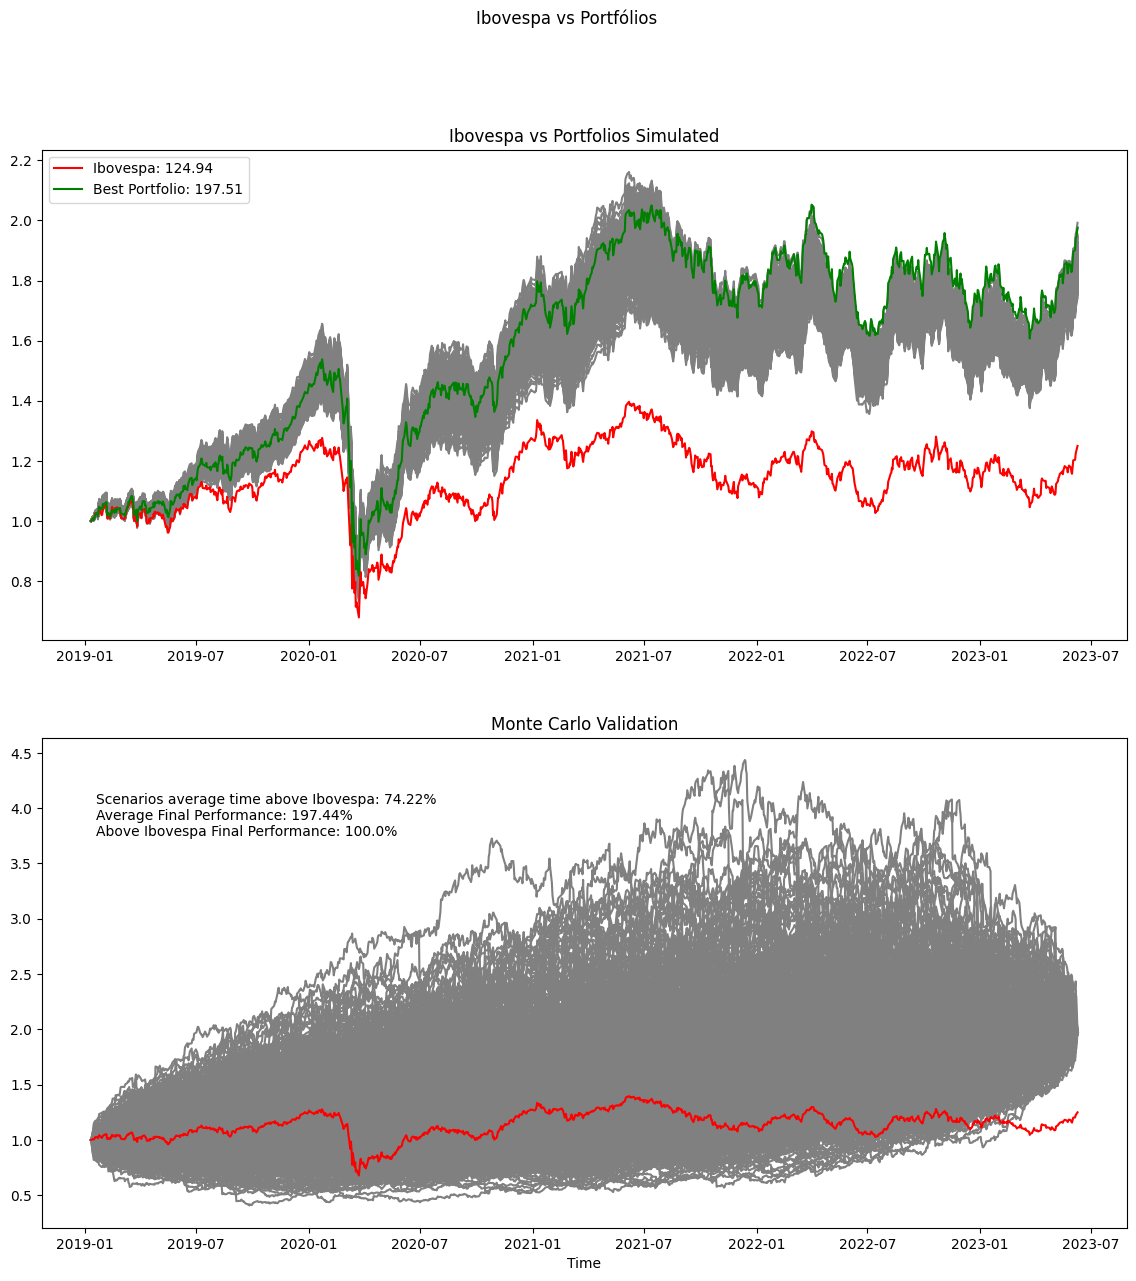

            Weight
CMIG4.SA  0.040726
HYPE3.SA  0.040088
GGBR4.SA  0.039815
GOLL4.SA  0.039503
CSNA3.SA  0.039458
PETR3.SA  0.039073
VBBR3.SA  0.039027
MGLU3.SA  0.038864
CVCB3.SA  0.037008
ECOR3.SA  0.034138


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  66 of 66 completed

1 Failed download:
['CIEL3.SA']: YFChartError('%ticker%: No data found, symbol may be delisted')
C:\Users\joaov\AppData\Local\Temp\ipykernel_26156\871854796.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  portfolios = pd.concat([portfolios, portfolio], ignore_index=True)
C:\Users\joaov\AppData\Local\Temp\ipykernel_26156\866347862.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries 

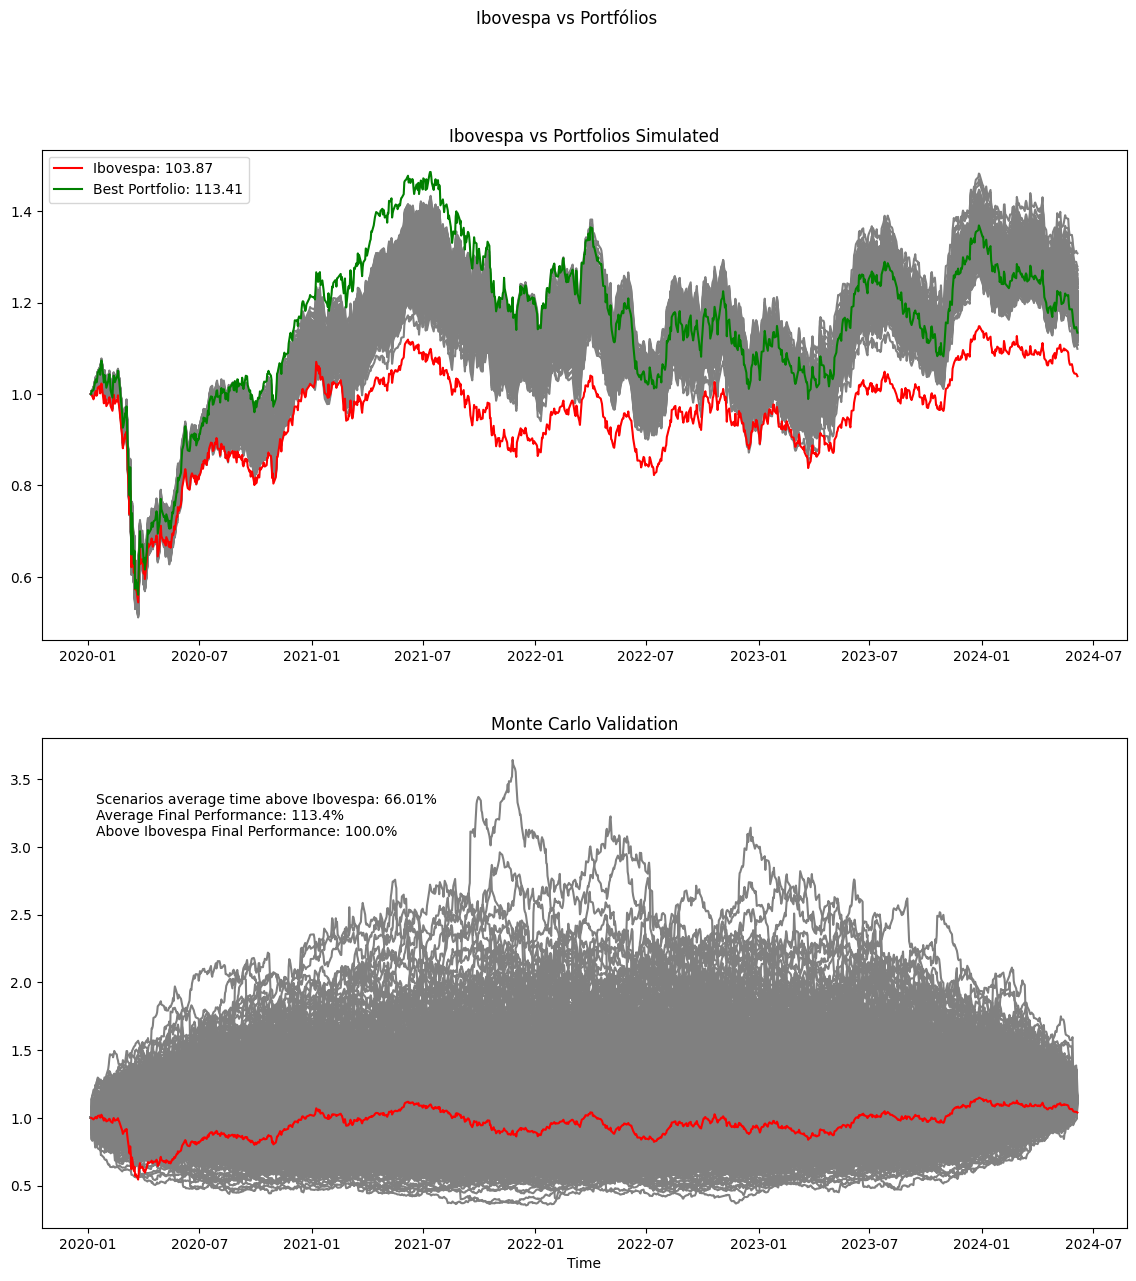

             Weight
ECOR3.SA   0.040219
GOLL4.SA   0.038606
VALE3.SA   0.038479
SUZB3.SA   0.037816
PCAR3.SA   0.037576
BPAC11.SA  0.036772
BRAP4.SA   0.036177
UGPA3.SA   0.035181
BBSE3.SA   0.035113
MRFG3.SA   0.031573
CPU times: total: 2h 17min 29s
Wall time: 8h 37min 23s


In [8]:
%%time

start_dates = ['2018-01-01','2019-01-11','2020-01-06']
end_dates = ['2022-06-01','2023-06-11','2024-06-06']
stocks_list = [stocks_01_01_2018, stocks_11_01_2019, stocks_06_01_2020]
number_of_simulations = 1000
Portfolios_per_simulation = 1000

for stocks, start_date, end_date in zip(stocks_list, start_dates, end_dates):

  ibov = yfin.download(["^BVSP"], start=start_date, end=end_date)['Adj Close']
  ibov = (ibov/ibov.shift(1))-1
  ibov.iloc[0] = 0

  performances = pd.DataFrame(ibov)
  performances.columns = ['Ibovespa']

  portfolios = Mult_MMPT(number_of_simulations, Portfolios_per_simulation, stocks, start_date, end_date)

  for portfolio in range(len(portfolios)):

    portfolio_performance = pd.DataFrame(data = {f'Portfolio {portfolio}': list(portfolios.iloc[portfolio]['Daily Performance'].values())},
                                         index = list(portfolios.iloc[portfolio]['Daily Performance'].keys()))

    performances = pd.merge(performances, portfolio_performance, left_index=True, right_index=True)

  performances = performances + 1
  cum_performances = performances.cumprod()

  ibovespa_performance = round(cum_performances.iloc[-1]['Ibovespa']*100, 2)

  #bestFinalPerformancePortfolio = cum_performances.iloc[-1].idxmax()
  #bestFinalPerformancePortfolio_performance = round(cum_performances.iloc[-1][bestFinalPerformancePortfolio]*100, 2)

  cum_performances['Best Performance'] = cum_performances.idxmax(axis=1)

  bestAveragePerformancePortfolio = cum_performances['Best Performance'].value_counts().idxmax()
  bestAveragePerformancePortfolio_performance = round(cum_performances.iloc[-1][bestAveragePerformancePortfolio]*100, 2)

  fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(14, 14))

  ax[0].set_title('Ibovespa vs Portfolios Simulated')
  ax[0].plot(cum_performances.index, cum_performances.drop(['Ibovespa', 'Best Performance', bestAveragePerformancePortfolio], axis=1), color='gray')
  ax[0].plot(cum_performances.index, cum_performances['Ibovespa'], color='red', label=f'Ibovespa: {ibovespa_performance}')
  #ax[0].plot(cum_performances.index, cum_performances[bestFinalPerformancePortfolio], color='green', label=f'Best Final Performance Portfolio: {bestFinalPerformancePortfolio_performance}')
  ax[0].plot(cum_performances.index, cum_performances[bestAveragePerformancePortfolio], color='green', label=f'Best Portfolio: {bestAveragePerformancePortfolio_performance}')
  ax[0].legend(loc="upper left")

  mc_df = performances[['Ibovespa']][1:]
  for k in range(1000):
    resampled_performance = performances[bestAveragePerformancePortfolio][1:].sample(frac=1)
    mc_df[f'Scenario {k}'] = resampled_performance.values

  new_index = pd.to_datetime(performances.index[0])
  new_row = pd.DataFrame([1]*mc_df.shape[1], index=mc_df.columns).T
  new_row.index = [new_index]
  mc_df = pd.concat([new_row, mc_df])
  mc_df = mc_df.cumprod()

  comparison = []
  finalcomparison = []
  for j in range(1000):

    num_trues = (mc_df[f'Scenario {j}'] > mc_df['Ibovespa']).sum()
    comparison.append(100*num_trues/len(mc_df))

    higher = mc_df[f'Scenario {j}'].iloc[-1]  > mc_df['Ibovespa'].iloc[-1]
    finalcomparison.append(higher)

  ax[1].set_title('Monte Carlo Validation')
  ax[1].plot(mc_df.index, mc_df.drop(['Ibovespa'], axis=1), color='gray', label='Scenarios')
  ax[1].plot(mc_df.index, mc_df['Ibovespa'], color='red', label=f'Ibovespa')
  ax[1].text(0.05,0.8,f'Scenarios average time above Ibovespa: {round(np.array(comparison).mean(), 2)}%\nAverage Final Performance: {round(100*mc_df.iloc[-1].values.mean(), 2)}%\nAbove Ibovespa Final Performance: {round(100*sum(finalcomparison)/len(finalcomparison), 2)}%', transform=ax[1].transAxes)

  plt.xlabel('Performance')
  plt.xlabel('Time')
  plt.suptitle('Ibovespa vs Portfólios')
  plt.show()

  best_portfolio = pd.DataFrame.from_dict(portfolios.loc[int(bestAveragePerformancePortfolio.split(' ')[1]), 'Weights'], orient='index', columns=['Weight'])
  print(best_portfolio.sort_values('Weight', ascending=False).head(10))